# Performing integrations using SciPy

## Introduction
You have already learned how to work with Python and how to a perform statistical analysis using Pandas and NumPy. Next, we're going to take a look at SciPy, a Python library used to solve scientific and mathematical problems. It's built on top of the NumPy library.

## Installation
SciPy comes preinstalled with your Anaconda installation and it is available within Google Colab as well. If you're running into trouble, you can install it using `conda install scipy` or `pip install scipy`.

## Initialization
You only need to add the `import` statement to your Python file to use the SciPy library: `import scipy`.

## Usage
To perform numerical integrations, you need to use the `integrate` package of SciPy.

In this notebook, we will take a look at solving standard integrals using `integrate.quad` and solving ordinary differential equations (ODEs) using `integrate.odeint`.

An extensite documentation is available on [the SciPy website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad).

## Imports

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Numerical Integrations
### Single Integral
First, we will solve a standard numerical integral $f(x)$ using the `integrate.quad` function. As an example, let us integrate $f(x)=x^2$ from $x=0$ to $x=1$. As known, the integral should yield $\frac{1}{3}$. 




In [2]:
def model(x):
  y = x ** 2
  
  return y

ans, err = integrate.quad(model, 0, 1)

print(ans)
print(err)

0.33333333333333337
3.700743415417189e-15


As you can see, the integral solved with an accuracy op to $e^{-15}$, which is well within our desired accuracy. The `quad` function returns two values, which we store in the `ans` and `err` variables.

### Double Integral
We can solve double integrals using this approach as well. The SciPy package includes a seperate double integral function (`integrate.dblquad`) as well, so you do not need to nest two `quad` integrals.

In [3]:
def model2(x, t):
  y = t * x ** 2

  return y

ans, err = integrate.dblquad(model2, 0, 2, lambda x: 0, lambda x: 1)
# We integrate t from 0 to 2 and x from 0 to 1.

print(ans)
print(err)


0.6666666666666667
7.401486830834377e-15


## Ordinary Differential Equations

A linear differential equation is a differential equation that is defined by a linear polynomial in the unknown function and its derivatives, that is an equation of the form:
\begin{equation}
a_0(x)y +a_1(x)y' + a_2(x)y'' +\cdots +a_n(x)y^{(n)}+b(x)=0,
\end{equation}
where $a_0(x)$, ..., $a_n(x)$ and $b(x)$ are arbitrary differentiable functions that do not need to be linear, and  $y', \ldots, y^{(n)}$ are the successive derivatives of the unknown function $y$ of the variable $x$.



## First Order ODEs
Consider the following first order ODE:
\begin{equation}
\frac{dy}{dx}+y=x,
\end{equation}
given the initial condition $y(0)=1$. You should be able to work out the analytical solution for this ODE:
\begin{equation}
y=x-1+2e^{-x}.
\end{equation}
We are going to try to solve the ODE numerically and compare the result with our analytical solution.

In [4]:
def dy_dx(y, x):
    return x - y
# We have defined a function by rewriting the equation as dy/dx = ...

xs = np.linspace(0,5,100)  # A linear set of values between 0 and 5 with 100 increments
y0 = 1.0  # Our initial condition
y_num = integrate.odeint(dy_dx, y0, xs) # Calculate the numerical solution for y
y_num = np.array(y_num).flatten() # We need to flatten the array to a single row

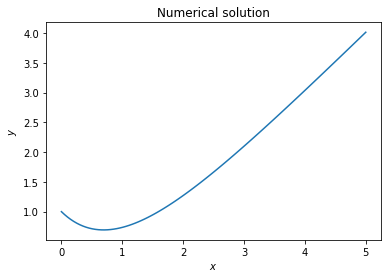

In [5]:
# Plotting the numerical solution for y
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Numerical solution")
plt.plot(xs, y_num)

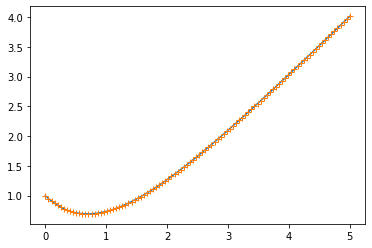

In [6]:
# Let's check how this compares to our analytical solution
y_exact = xs - 1 + 2*np.exp(-xs)
plt.plot(xs, y_num, xs, y_exact, "+");

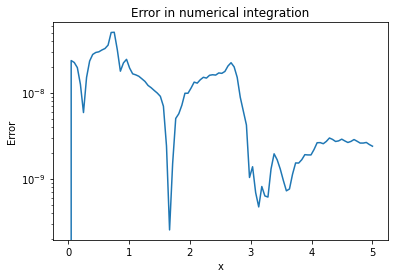

In [7]:
# Looks identical, let's check out the difference
y_diff = np.abs(y_exact - y_num)
plt.semilogy(xs, y_diff)
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 

## Second Order ODEs
Likewise, we can also use `odeint` to solve second order ODEs. Consider the following ODE:
\begin{equation}
y''+2y'+2y=\text{cos}(2x),
\end{equation}
with initial conditions $y(0)=0$ and $y'(0)=0$. We apply the following transformation:
\begin{equation}
z=y',
\end{equation}
to arrive at the following ODE:
\begin{equation}
z'+2z+2y=\text{cos}(2x),\text{ and }z(0)=y(0)=0.
\end{equation}

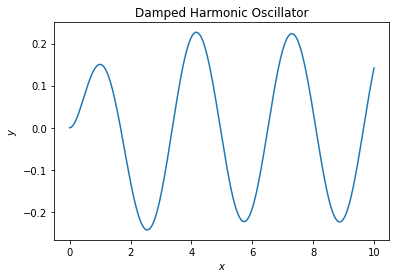

In [8]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = integrate.odeint(dU_dx, U0, xs)
ys = Us[:,0]

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Damped Harmonic Oscillator")
plt.plot(xs,ys);

## Using Parameters in ODEs
You can pass parameters to your ODE using the `args` parameter of the `odeint` function.

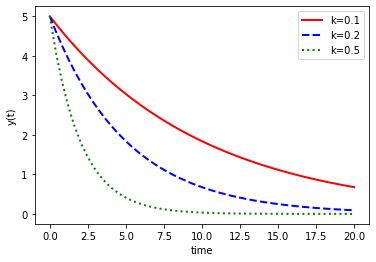

In [9]:
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = integrate.odeint(model,y0,t,args=(k,))
k = 0.2
y2 = integrate.odeint(model,y0,t,args=(k,))
k = 0.5
y3 = integrate.odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Other Topics
We hope this got you started on using the `integrate` package of SciPy. Make sure to use Google to find out other functions and other applications. Good luck!